In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv


In [43]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [44]:
data=pd.read_csv('/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv')
df=pd.DataFrame(data)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.shape

(569, 33)

In [47]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [48]:
df=df.drop(columns=['id','Unnamed: 32'])

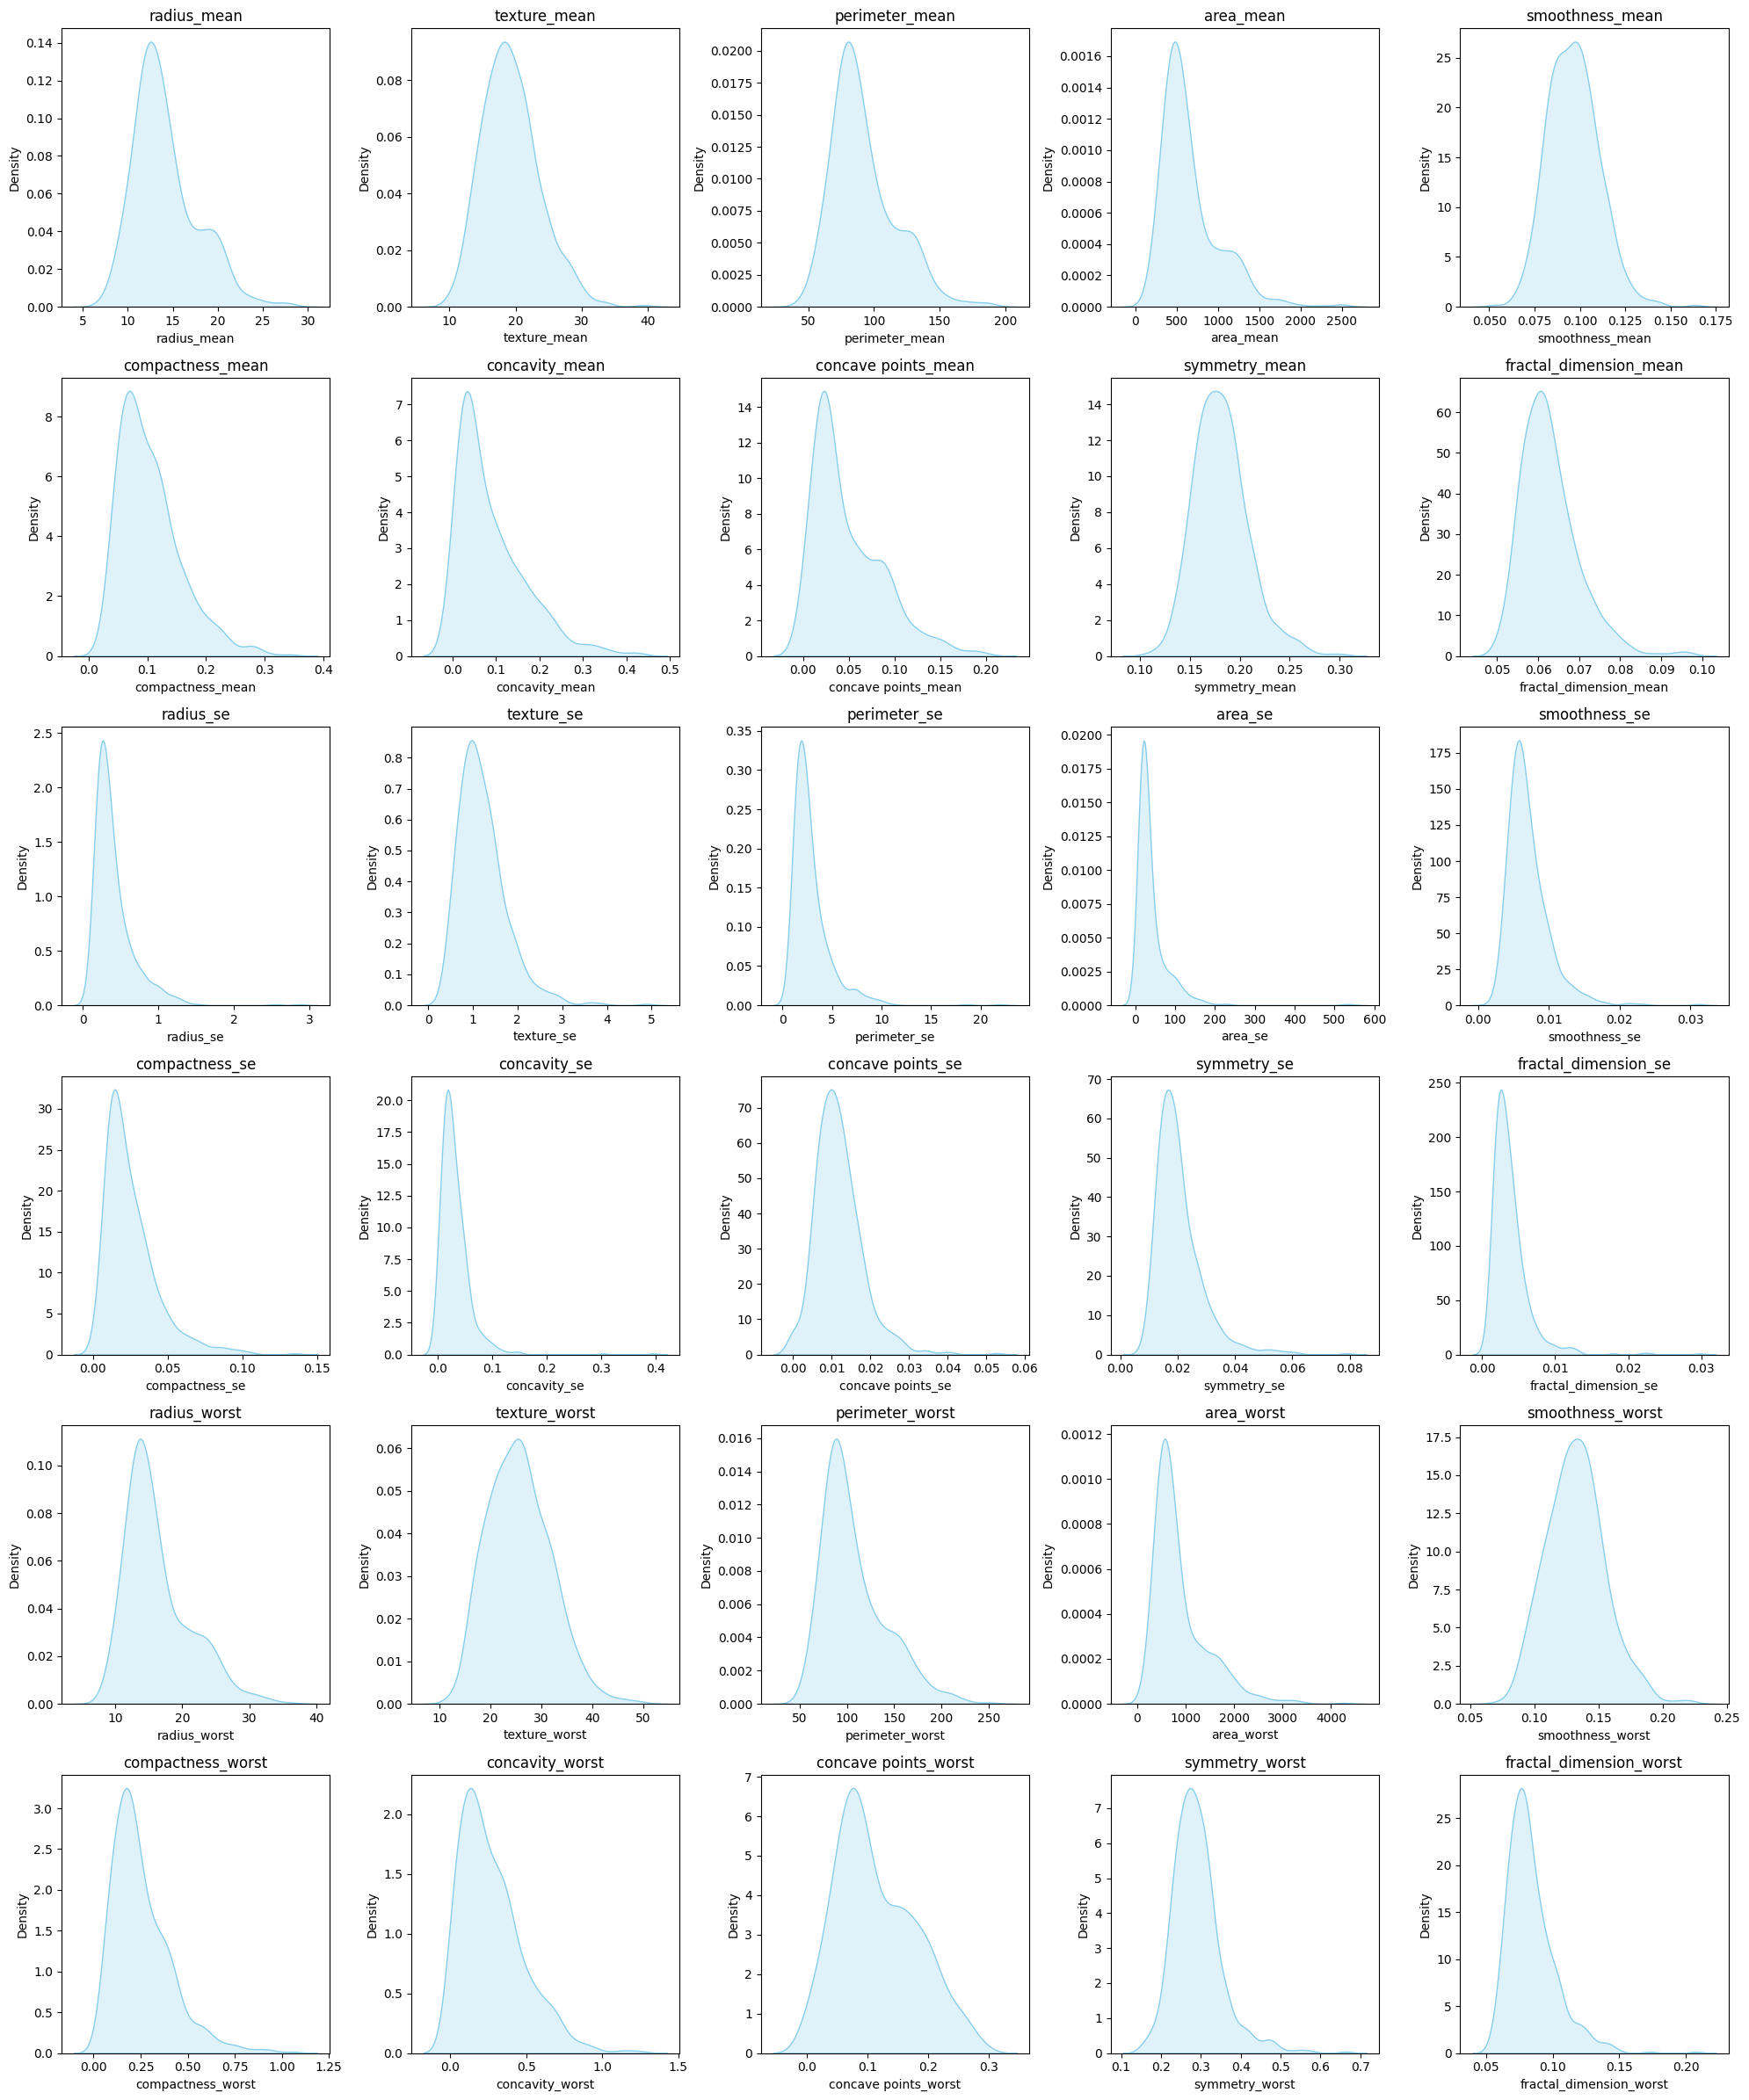

In [49]:
columns=df.drop(columns='diagnosis').select_dtypes(include='number').columns.tolist()
n_cols=5
n_rows=(len(columns)+n_cols-1)//n_cols

plt.figure(figsize=(20,4*n_rows))
for i,col in enumerate(columns):
    plt.subplot(n_rows,n_cols,i+1)
    sns.kdeplot(df[col],fill=True,color='skyblue')
    plt.title(col)
    plt.tight_layout()
plt.show()

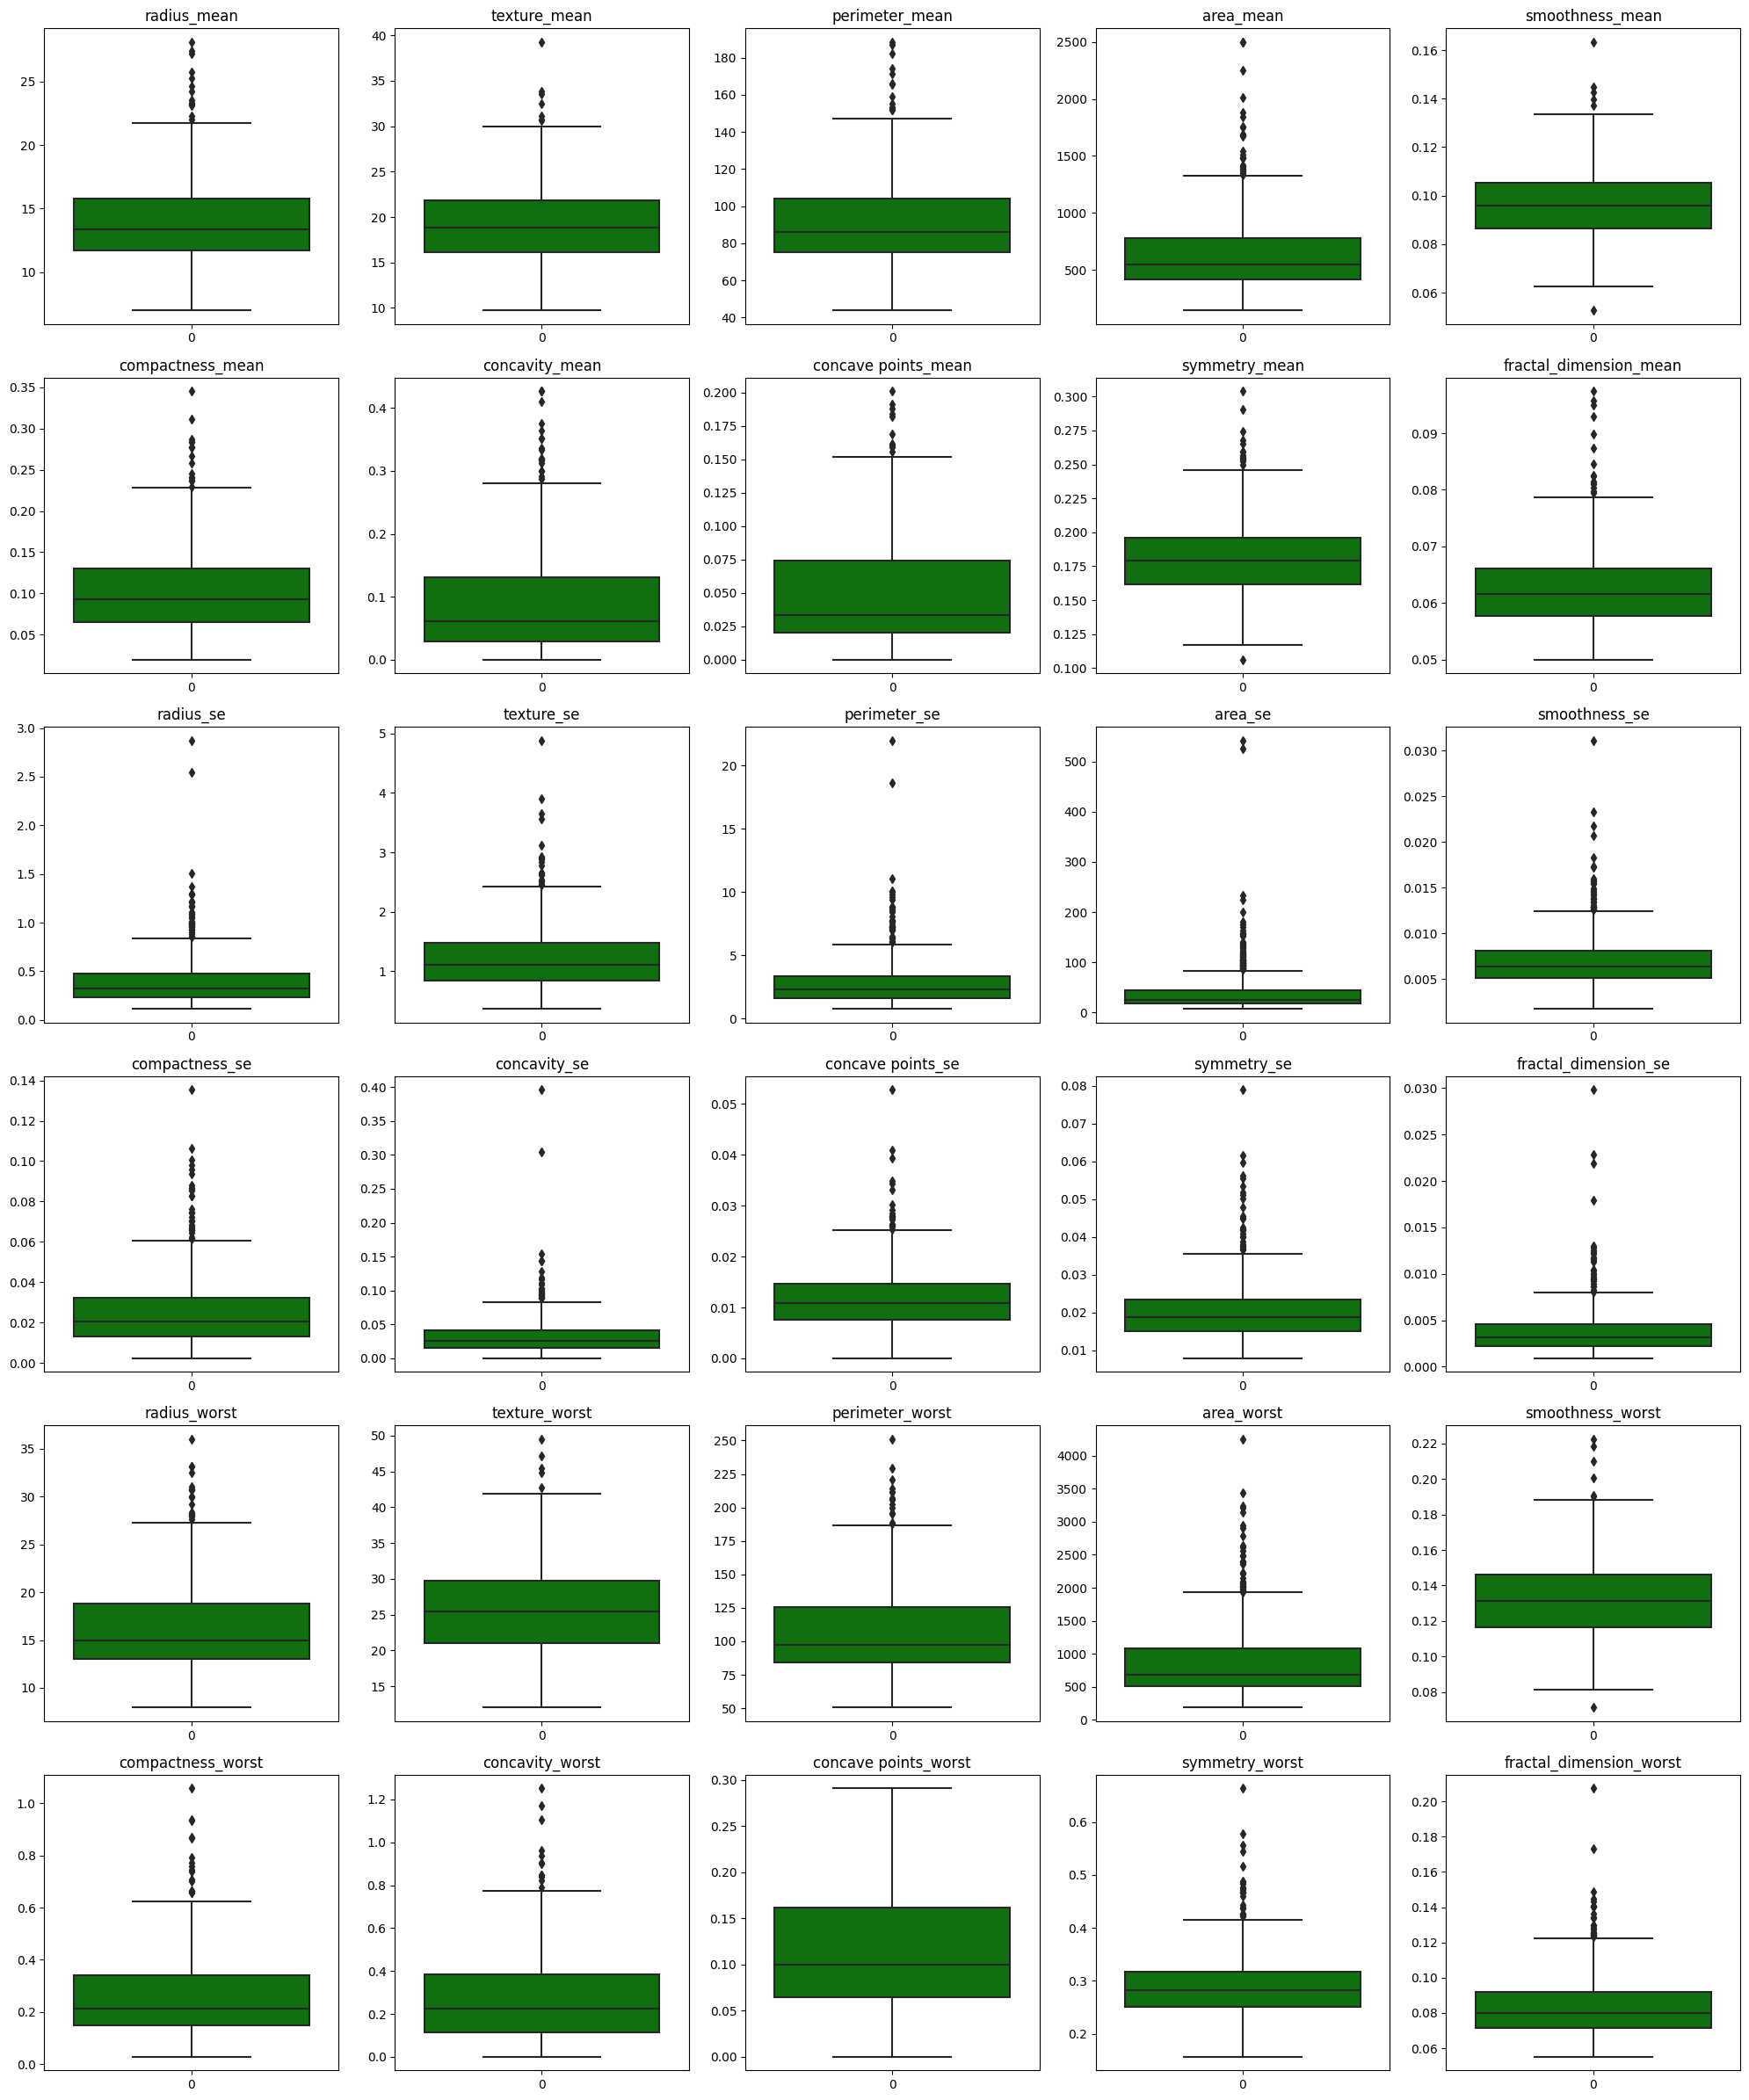

In [50]:
columns=df.drop(columns='diagnosis').select_dtypes(include='number').columns.tolist()
n_cols=5
n_rows=(len(columns)+n_cols-1)//n_cols

plt.figure(figsize=(20,4*n_rows))
for i,col in enumerate(columns):
    plt.subplot(n_rows,n_cols,i+1)
    sns.boxplot(df[col],color='green')
    plt.title(col)
    plt.tight_layout()
plt.show()

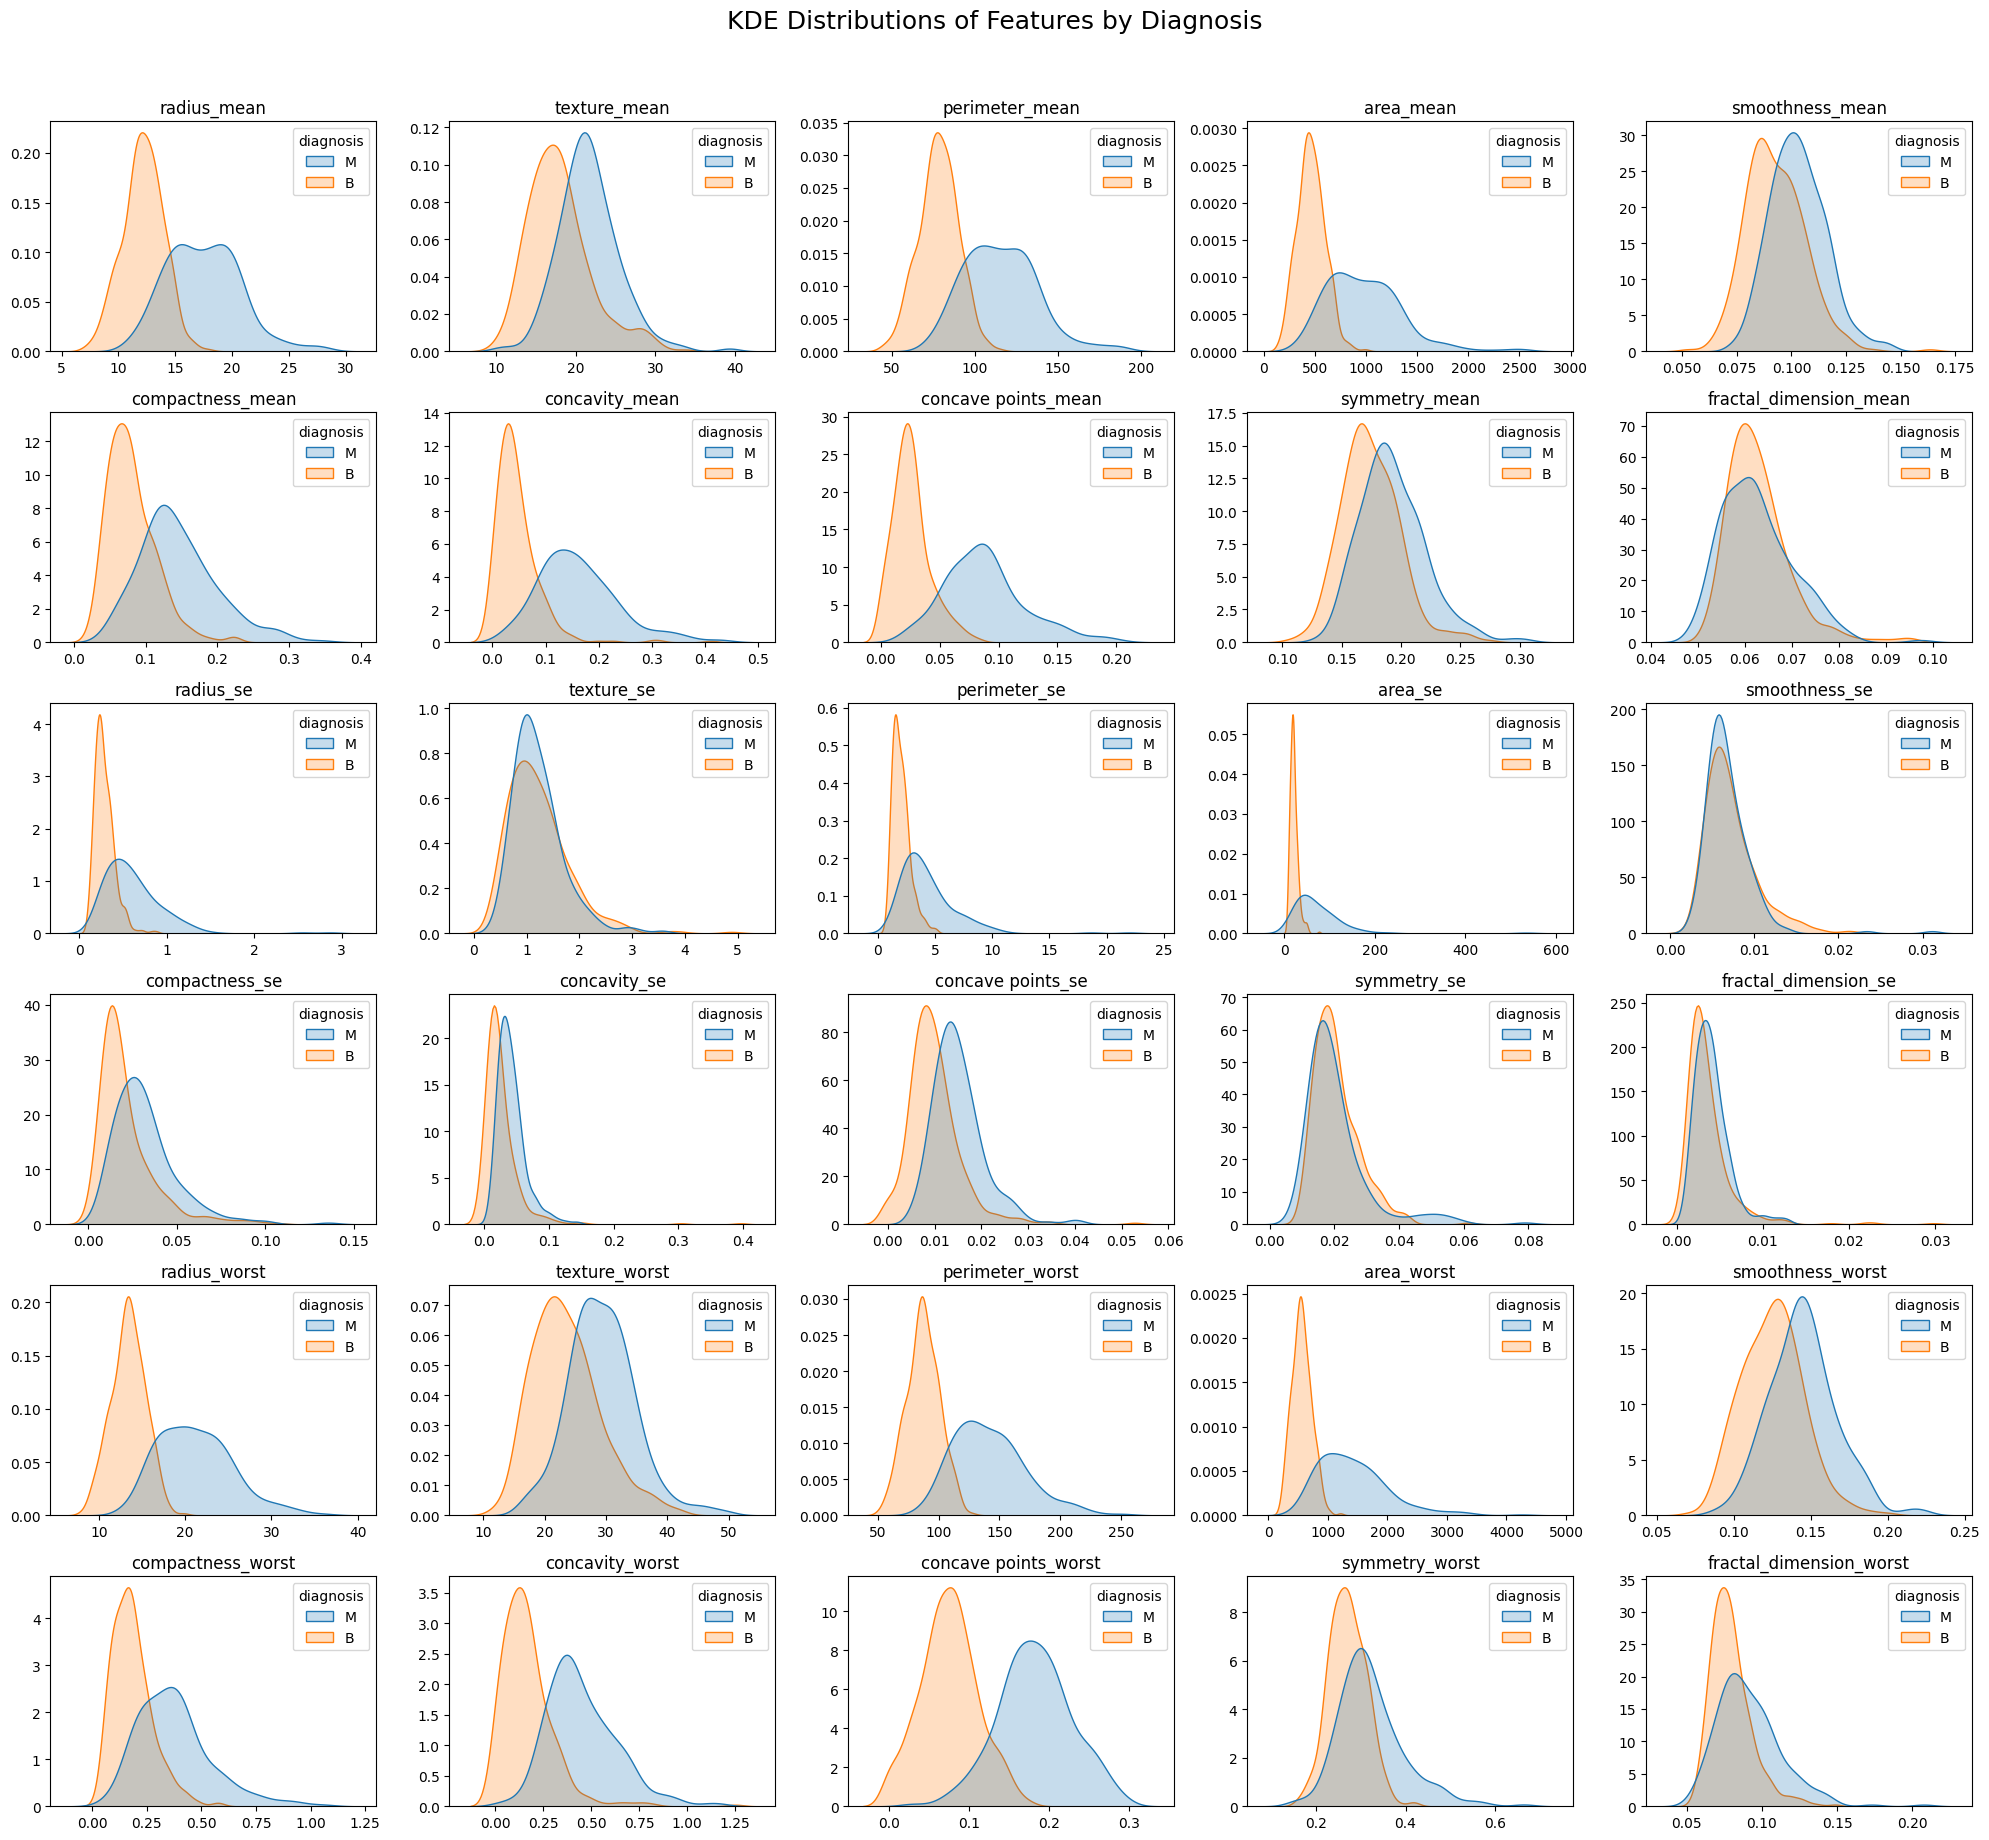

In [51]:
n_cols = 5  # you can change to 4 or 6 based on screen
n_rows = (len(columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))

# 3. Loop over all numeric columns
for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=df, x=col, hue='diagnosis', fill=True, common_norm=False)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("KDE Distributions of Features by Diagnosis", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

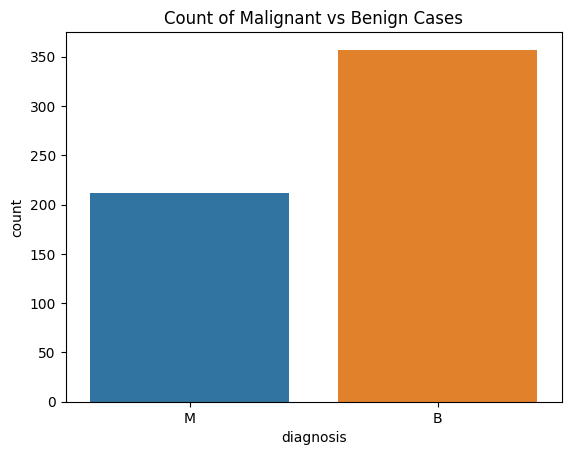

In [52]:
sns.countplot(data=df, x='diagnosis')
plt.title("Count of Malignant vs Benign Cases")
plt.show()


mild class imbalance is there 


In [56]:
X=df.drop(columns=['diagnosis'])
y=df['diagnosis']
y=y.map({'B':0,'M':1})

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# **Standardization**

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Classifer

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [60]:
logreg=LogisticRegression(class_weight='balanced',random_state=42)
svc=SVC(probability=True,class_weight='balanced',random_state=42)
dtree=DecisionTreeClassifier(class_weight='balanced',random_state=42)
knn=KNeighborsClassifier(n_neighbors=5)
xgb=XGBClassifier(use_label_encoder=False,eval_metrics='logloss',random_state=42)

In [61]:
models = {
    "Logistic Regression": logreg,
    "SVC": svc,
    "Decision Tree": dtree,
    "KNN": knn,
    "XGBoost": xgb
}

# Evaluate the metrics

In [69]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
for name,model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred=model.predict(X_test_scaled)

    print(f"{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1))
    print("Recall:", recall_score(y_test, y_pred, pos_label=1))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
    print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*50)

Logistic Regression
Accuracy: 0.972027972027972
Precision: 0.9464285714285714
Recall: 0.9814814814814815
F1 Score: 0.9636363636363636
ROC AUC: 0.9975031210986267
Confusion Matrix:
 [[86  3]
 [ 1 53]]
SVC
Accuracy: 0.958041958041958
Precision: 0.9285714285714286
Recall: 0.9629629629629629
F1 Score: 0.9454545454545454
ROC AUC: 0.9968789013732833
Confusion Matrix:
 [[85  4]
 [ 2 52]]
Decision Tree
Accuracy: 0.951048951048951
Precision: 0.9272727272727272
Recall: 0.9444444444444444
F1 Score: 0.9357798165137615
ROC AUC: 0.9497503121098627
Confusion Matrix:
 [[85  4]
 [ 3 51]]
KNN
Accuracy: 0.958041958041958
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444
ROC AUC: 0.9856429463171035
Confusion Matrix:
 [[86  3]
 [ 3 51]]
XGBoost
Accuracy: 0.958041958041958
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444
ROC AUC: 0.9929255097794423
Confusion Matrix:
 [[86  3]
 [ 3 51]]


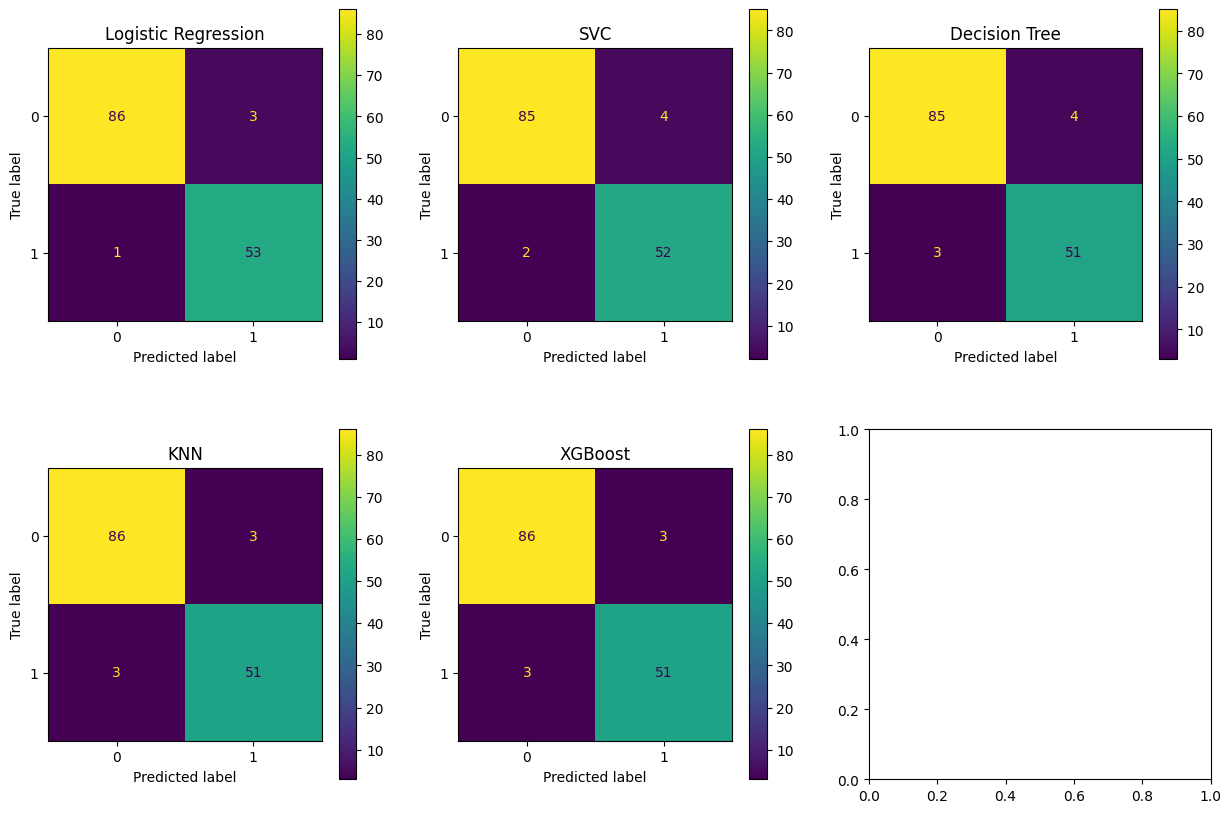

In [72]:
n_models = len(models)
n_cols = 3  
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, ax=axes[idx])
    axes[idx].set_title(name)

# Cross validation

In [81]:
from sklearn.model_selection import cross_val_score
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Avg Accuracy Score = {scores.mean():.4f}")

Logistic Regression: Avg Accuracy Score = 0.9765
SVC: Avg Accuracy Score = 0.9741
Decision Tree: Avg Accuracy Score = 0.9178
KNN: Avg Accuracy Score = 0.9601
XGBoost: Avg Accuracy Score = 0.9601


In [82]:
from sklearn.metrics import make_scorer
precision_scorer = make_scorer(precision_score, average='macro')
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=precision_scorer)
    print(f"{name}: Avg Precision Score = {scores.mean():.4f}")


Logistic Regression: Avg Precision Score = 0.9756
SVC: Avg Precision Score = 0.9722
Decision Tree: Avg Precision Score = 0.9135
KNN: Avg Precision Score = 0.9656
XGBoost: Avg Precision Score = 0.9592


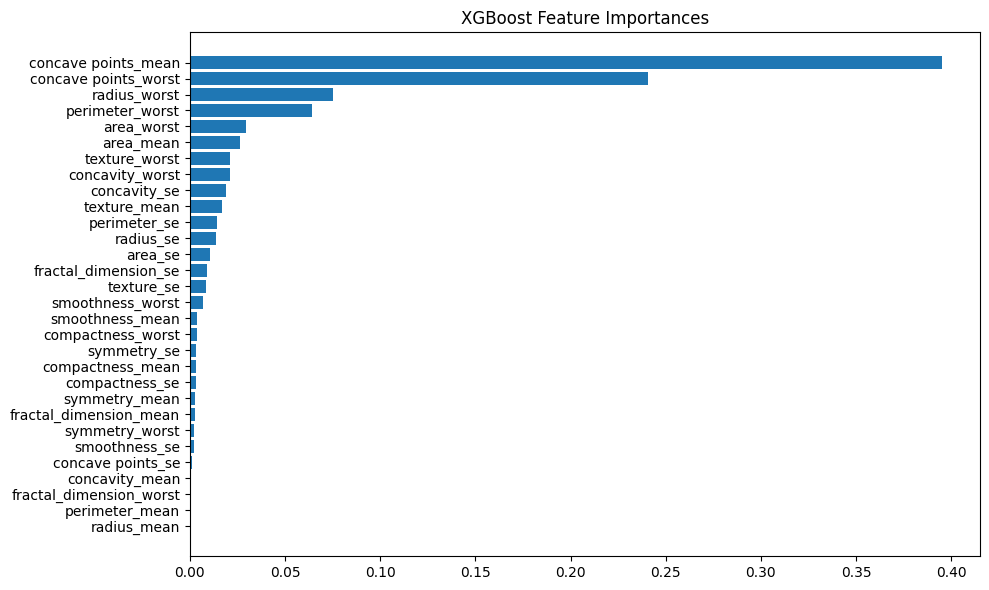

In [84]:
importances = xgb.feature_importances_
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()


In [94]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.01,0.1,1,10],
    'penalty':['l1','l2'],
    'solver':['liblinear']
}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring='f1')
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 Score: 0.9743597386220337


In [96]:
from sklearn.metrics import classification_report
# Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))


🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [99]:
best_model.fit(X_train,y_train)
Y_pred=best_model.predict(X_train_scaled)

In [100]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [102]:
import joblib
joblib.dump(best_model, 'logistic_model.pkl')
print("Model saved successfully as 'logistic_model.pkl'")


Model saved successfully as 'logistic_model.pkl'
